# 🧪 Parcial – Métodos Predictivos
Completa las celdas con `TODO` y ejecuta `Runtime → Run all` antes de entregar.

## 🎯 Instrucciones Generales
- Este parcial está dividido en dos partes: teoría (40 pts) y práctica (60 pts).
- Documenta claramente tu código y explica tus respuestas en celdas Markdown.
- Al finalizar, exporta el notebook a PDF y entrega también tus 5 slides con visualizaciones clave.


## <a id='parte-a'></a>📝 Parte A — Cuestionario Teórico (40 pts)
Responde **brevemente** en las celdas Markdown que siguen a cada pregunta.


#### 1️⃣ **Variable objetivo (y)** – Defínela y da un ejemplo en este dataset.

*Respuesta:* <!-- TODO -->  Es la variable que queremos predecir o explicar en un modelo de ML. Por ejemplo, en un dataset de ventas, la variable ventas_mensuales podría ser la variable objetivo.


#### 2️⃣ Ordena las fases del *pipeline* de ML: `Modelado`, `Pre‑procesamiento`, `EDA`, `Evaluación`, `Insight de negocio`.

*Respuesta:* <!-- TODO --> Insight de negocio

EDA (Análisis exploratorio de datos)

Preprocesamiento

Modelado

Evaluación


#### 3️⃣ Para un problema de **clases desbalanceadas**, ¿qué métrica priorizarías y por qué?

*Respuesta:* <!-- TODO --> es útil cuando una clase es mucho más frecuente que la otra.


#### 4️⃣ Describe **overfitting** y cómo lo detectarías en la práctica.

*Respuesta:* <!-- TODO --> Overfitting ocurre cuando un modelo se ajusta demasiado a los datos de entrenamiento y no generaliza bien a nuevos datos.



#### 5️⃣ Completa: *K‑means es un algoritmo de _________ porque ________.*

*Respuesta:* <!-- TODO --> K-means es un algoritmo de aprendizaje no supervisado porque agrupa datos sin usar etiquetas conocidas.


#### 7️⃣ En **regresión**, ¿cómo es la variable objetivo? (cualitativa, cuantitativa, binaria…).

*Respuesta:* <!-- TODO --> Cuantitativa continua, ya que representa valores numéricos como precios, temperaturas o salarios.


#### 8️⃣ Menciona 2 técnicas comunes de **pre‑procesamiento de texto**.

*Respuesta:* <!-- TODO --> Tokenización

Eliminación de stopwords


#### 9️⃣ ¿Qué representa el parámetro *k* en K‑means y qué ocurre si es muy grande?

*Respuesta:* <!-- TODO -->
  Si es muy grande, cada punto puede quedar en su propio cluster, perdiendo generalización y utilidad.

#### 🔟 Define brevemente un **embedding** en NLP y su utilidad.

*Respuesta:* <!-- TODO --> representación numérica densa de palabras en un espacio vectorial. Permite capturar relaciones semánticas y sintácticas entre palabras para que puedan ser usadas por algoritmos de ML.


In [ ]:
!wget https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/TercerCorte/amazon.csv.zip

--2025-06-04 21:41:55--  https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/TercerCorte/amazon.csv.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/TercerCorte/amazon.csv.zip [following]
--2025-06-04 21:41:56--  https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/TercerCorte/amazon.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2043633 (1.9M) [application/zip]
Saving to: ‘amazon.csv.zip’

amazon.csv.zip      100%[===================>]   1.95M  --.-KB/s    in 0.08s   

In [ ]:
!unzip amazon.csv.zip

Archive:  amazon.csv.zip
  inflating: amazon.csv              


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings, random
warnings.filterwarnings('ignore')
random.seed(42)
np.random.seed(42)

### 2. Carga de datos

In [ ]:
# Reemplaza con la ruta correcta de tu archivo CSV si lo subes a Colab
df = pd.read_csv('amazon.csv')
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


### 3. Limpieza y Feature Engineering


*   Tome `review_content` para crear una columna text

*   Haga una limpieza de rating:
```
df['col'] = df['col'].str.replace(',', '.').str.strip()
df['col'] = df['col'].str.replace('|', '0').str.strip()
df['col'] = df['col'].astype(float)
```
*   Haga una limpieza de `discounted_price`


```
  df['col'] = df['col'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
  df['col'] = df['col'].replace('₹', '', regex=True).astype(float)
```



*   Haga una limpieza de `actual_price`

```
df['col'] = df['col'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
df['col'] = df['col'].replace('₹', '', regex=True)
df['col'] = df['col'].astype(float)
```


*   Cree la variable `positive` donde `ranting` se mayor a 4:
```
df['col1'] = df['col2'].apply(lambda x: 1 if x >= 4 else 0)
```

*   Con `discount_percentage` donde `ranting` se mayor a 4:
```
df['col'] = df['col'].replace('%', '', regex=True).astype(float)
```

In [ ]:
from wordcloud import WordCloud

In [ ]:
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:

df['text'] = df['review_content']

In [ ]:

# Limpieza de la columna 'rating'
df['rating'] = (
    df['rating']
    .astype(str)                    # Asegura que todo sea string
    .str.replace(',', '.', regex=False)  # Reemplaza coma decimal por punto
    .str.replace('|', '0', regex=False)  # Reemplaza barras por cero
    .str.strip()                    # Elimina espacios
)

# Convierte a float, manejando errores
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

## 💻 Parte B – Práctica (60 pts)
### 1. Setup


## Realize dos WorldClouds uno con reviews positivos y otro con negativos y haga un grafico de barras comaparado por los 10 mas comunes.

In [ ]:
def limpiar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'[^\w\s]', '', texto)
    palabras = texto.split()
    palabras = [palabra for palabra in palabras if palabra not in stop_words]
    return palabras

In [ ]:
def contar_palabras(texto):
    palabras = limpiar_texto(texto)
    return Counter(palabras)

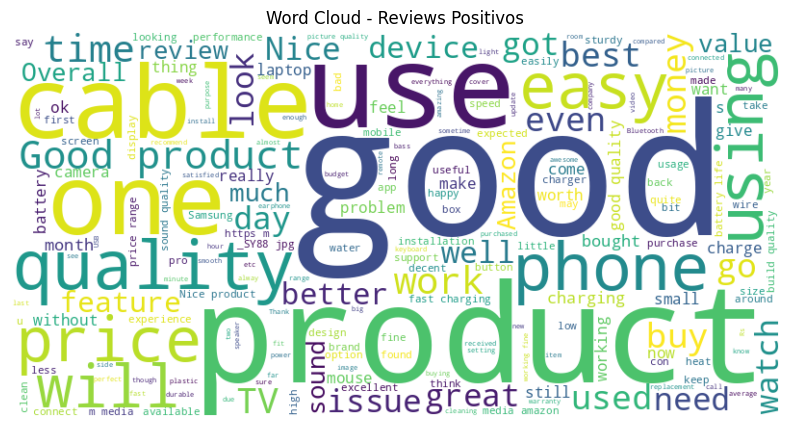

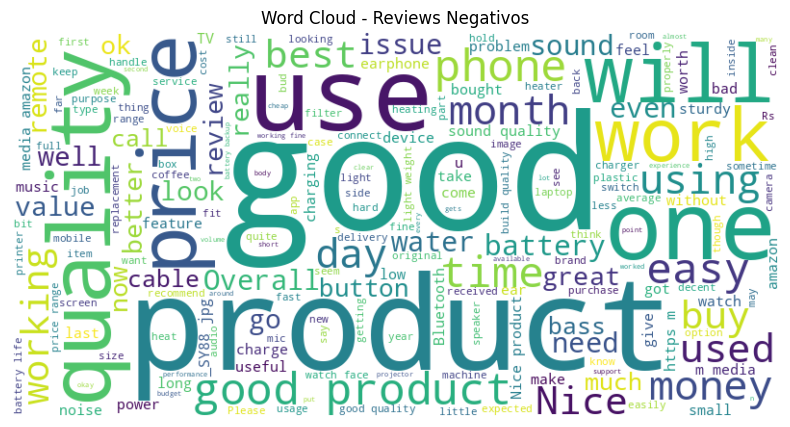

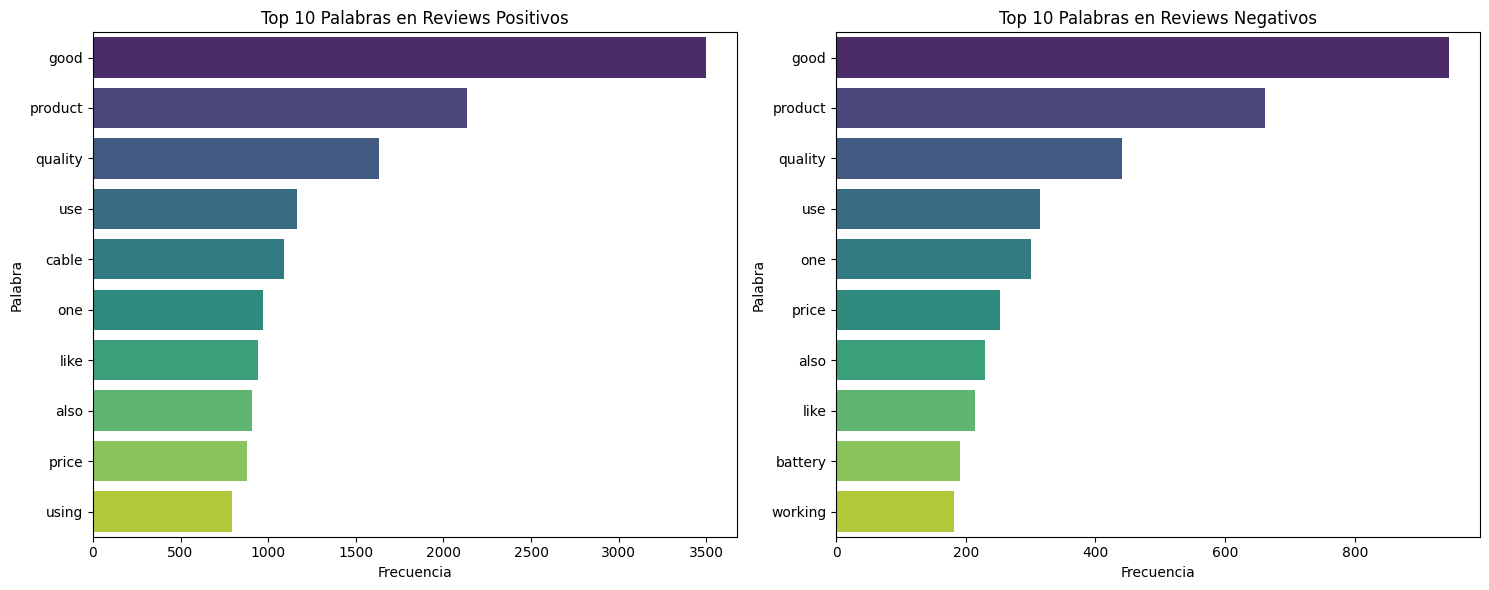

In [ ]:
# prompt: Realize dos WorldClouds uno con reviews positivos y otro con negativos y haga un grafico de barras comaparado por los 10 mas comunes.

import matplotlib.pyplot as plt
# Separa los reviews en positivos y negativos
positive_reviews = df[df['rating'] >= 4]['text'].dropna()
negative_reviews = df[df['rating'] < 4]['text'].dropna()

# Genera WordCloud para reviews positivos
if not positive_reviews.empty:
    positive_text = " ".join(positive_reviews)
    wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_positive, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud - Reviews Positivos")
    plt.show()
else:
    print("No hay reviews positivos para generar el WordCloud.")

# Genera WordCloud para reviews negativos
if not negative_reviews.empty:
    negative_text = " ".join(negative_reviews)
    wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_negative, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud - Reviews Negativos")
    plt.show()
else:
    print("No hay reviews negativos para generar el WordCloud.")

# Cuenta las palabras más comunes en reviews positivos
positive_word_counts = Counter()
for review in positive_reviews:
    positive_word_counts.update(contar_palabras(review))

# Cuenta las palabras más comunes en reviews negativos
negative_word_counts = Counter()
for review in negative_reviews:
    negative_word_counts.update(contar_palabras(review))

# Obtiene las 10 palabras más comunes en cada categoría
top_10_positive = positive_word_counts.most_common(10)
top_10_negative = negative_word_counts.most_common(10)

# Prepara los datos para el gráfico de barras
words_positive = [word for word, count in top_10_positive]
counts_positive = [count for word, count in top_10_positive]

words_negative = [word for word, count in top_10_negative]
counts_negative = [count for word, count in top_10_negative]

# Crea el gráfico de barras comparado
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

if top_10_positive:
    sns.barplot(x=counts_positive, y=words_positive, ax=axes[0], palette='viridis')
    axes[0].set_title('Top 10 Palabras en Reviews Positivos')
    axes[0].set_xlabel('Frecuencia')
    axes[0].set_ylabel('Palabra')
else:
    axes[0].set_title('No hay datos de reviews positivos')
    axes[0].axis('off')

if top_10_negative:
    sns.barplot(x=counts_negative, y=words_negative, ax=axes[1], palette='viridis')
    axes[1].set_title('Top 10 Palabras en Reviews Negativos')
    axes[1].set_xlabel('Frecuencia')
    axes[1].set_ylabel('Palabra')
else:
    axes[1].set_title('No hay datos de reviews negativos')
    axes[1].axis('off')


plt.tight_layout()
plt.show()


### 4. Análisis Exploratorio de Datos (EDA)

### 5. Clasificación Supervisada – Regresión Logística (25 pts)


*   Haga una regresion logistica de postive vs text
*   Muestre los resultados en una matriz de confusion



              precision    recall  f1-score   support

           0       1.00      0.14      0.24        74
           1       0.77      1.00      0.87       219

    accuracy                           0.78       293
   macro avg       0.89      0.57      0.56       293
weighted avg       0.83      0.78      0.71       293



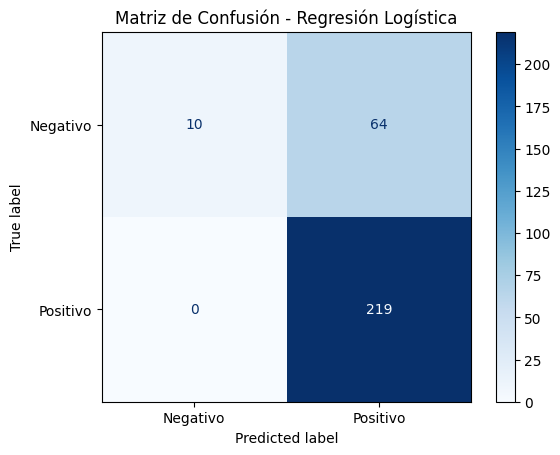

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['positive'], test_size=0.2, random_state=42)

# Creación de un pipeline con TfidfVectorizer y Logistic Regression
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('logistic', LogisticRegression())
])

# Entrenamiento del modelo
pipeline.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Evaluación del modelo y visualización de la matriz de confusión
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test, display_labels=['Negativo', 'Positivo'], cmap=plt.cm.Blues)
plt.title('Matriz de Confusión - Regresión Logística')
plt.show()



### 6. Agrupamiento K-Means – No Supervisado (20 pts)


*   Cree una variable cluster usando un modelo de clustering

*   Como podria nombrar los clusters usando las otras variables



Silhouette Score for k=2: 0.3111
Silhouette Score for k=3: 0.3139
Silhouette Score for k=4: 0.3170
Silhouette Score for k=5: 0.3116
Silhouette Score for k=6: 0.3430
Silhouette Score for k=7: 0.3555
Silhouette Score for k=8: 0.3055
Silhouette Score for k=9: 0.3062
Silhouette Score for k=10: 0.2967

Mejor K según Silhouette Score: 7

DataFrame con la nueva columna 'cluster':
   rating  discounted_price  actual_price  discount_percentage  cluster
0     4.2              3990          1099                   64        6
1     4.0              1990           349                   43        0
2     3.9              1990          1899                   90        6
3     4.2              3290           699                   53        6
4     4.2              1540           399                   61        6

Características de los Clusters:
           rating              discounted_price                  \
             mean median count             mean    median count   
cluster                 

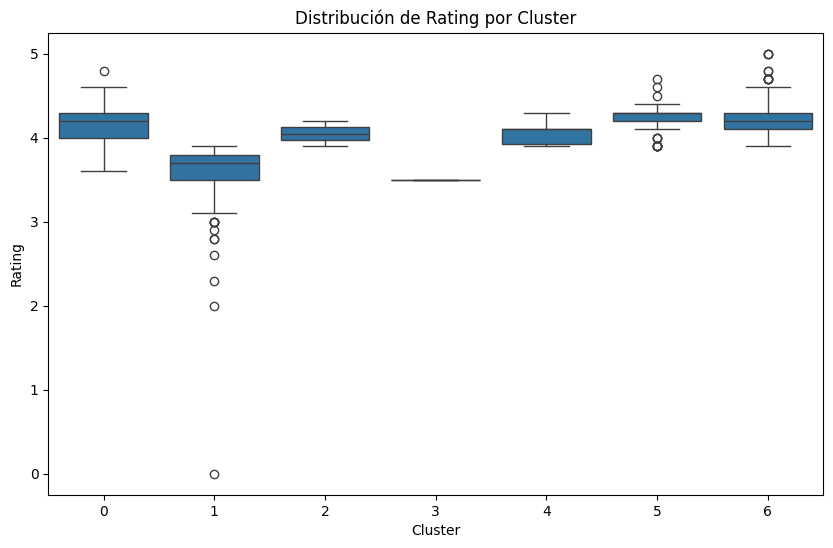

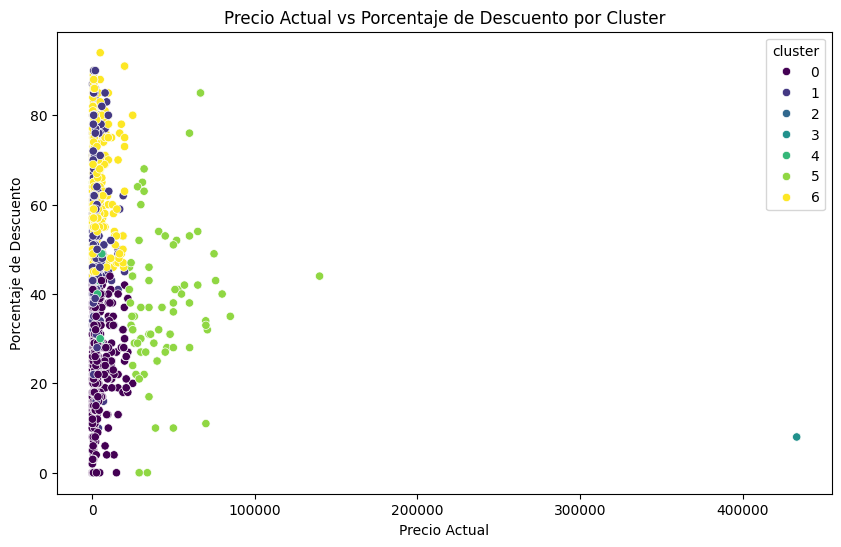

In [ ]:
# prompt: Cree una variable cluster usando un modelo de clustering
# Como podria nombrar los clusters usando las otras variables

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Limpieza y Feature Engineering para las columnas de precio
# Asegura que las columnas existen antes de limpiarlas
if 'discounted_price' in df.columns:
  df['discounted_price'] = (
      df['discounted_price']
      .astype(str)
      .str.replace('.', '', regex=False) # Elimina miles separators (punto)
      .str.replace(',', '.', regex=False) # Reemplaza coma decimal por punto
      .str.replace('₹', '', regex=True)   # Elimina el símbolo de rupia
  )
  # Convierte a float, manejando errores
  df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')
else:
    print("La columna 'discounted_price' no existe.")


if 'actual_price' in df.columns:
  df['actual_price'] = (
      df['actual_price']
      .astype(str)
      .str.replace('.', '', regex=False)  # Elimina miles separators (punto)
      .str.replace(',', '.', regex=False)  # Reemplaza coma decimal por punto
      .str.replace('₹', '', regex=True)    # Elimina el símbolo de rupia
  )
  # Convierte a float, manejando errores
  df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')
else:
    print("La columna 'actual_price' no existe.")

# Creación de la variable 'positive'
# Asegura que la columna 'rating' existe antes de usarla
if 'rating' in df.columns:
  df['positive'] = df['rating'].apply(lambda x: 1 if x is not None and x >= 4 else 0)
else:
    print("La columna 'rating' no existe, no se puede crear 'positive'.")

# Limpieza de la columna 'discount_percentage'
# Asegura que la columna existe antes de limpiarla
if 'discount_percentage' in df.columns:
  df['discount_percentage'] = (
      df['discount_percentage']
      .astype(str)
      .str.replace('%', '', regex=True) # Elimina el símbolo de porcentaje
  )
  # Convierte a float, manejando errores
  df['discount_percentage'] = pd.to_numeric(df['discount_percentage'], errors='coerce')
else:
    print("La columna 'discount_percentage' no existe.")


clustering_data = df[['rating', 'discounted_price', 'actual_price', 'discount_percentage']].dropna()

if clustering_data.empty:
    print("No hay suficientes datos numéricos limpios para realizar el clustering.")
else:

    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaled_clustering_data = scaler.fit_transform(clustering_data)


    silhouette_scores = []
    K_range = range(2, 11)
    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(scaled_clustering_data)
        score = silhouette_score(scaled_clustering_data, kmeans.labels_)
        silhouette_scores.append(score)
        print(f"Silhouette Score for k={k}: {score:.4f}")

    best_k = K_range[np.argmax(silhouette_scores)]
    print(f"\nMejor K según Silhouette Score: {best_k}")


    kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(scaled_clustering_data)


    cluster_series = pd.Series(clusters, index=clustering_data.index, name='cluster')


    df = df.join(cluster_series)

    print("\nDataFrame con la nueva columna 'cluster':")
    print(df[['rating', 'discounted_price', 'actual_price', 'discount_percentage', 'cluster']].head())


    print("\nCaracterísticas de los Clusters:")

    cluster_characteristics = df.groupby('cluster')[['rating', 'discounted_price', 'actual_price', 'discount_percentage', 'positive']].agg(['mean', 'median', 'count'])
    print(cluster_characteristics)

    if 'cluster' in df.columns and 'rating' in df.columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='cluster', y='rating', data=df.dropna(subset=['cluster', 'rating']))
        plt.title('Distribución de Rating por Cluster')
        plt.xlabel('Cluster')
        plt.ylabel('Rating')
        plt.show()

    # Ejemplo: Scatter plot de precio vs descuento por cluster
    if 'cluster' in df.columns and 'actual_price' in df.columns and 'discount_percentage' in df.columns:
         plt.figure(figsize=(10, 6))
         sns.scatterplot(x='actual_price', y='discount_percentage', hue='cluster', data=df.dropna(subset=['cluster', 'actual_price', 'discount_percentage']), palette='viridis', legend='full')
         plt.title('Precio Actual vs Porcentaje de Descuento por Cluster')
         plt.xlabel('Precio Actual')
         plt.ylabel('Porcentaje de Descuento')
         plt.show()

### 7. Insight & Recomendaciones (15 pts)
Escribe tu análisis aquí: Se realizó un análisis exploratorio de texto sobre los comentarios (review_content) de los productos en Amazon. Los pasos fueron los siguientes:

Clasificación de reseñas: Se dividieron en dos categorías:

Positivas: con puntuación (rating) mayor o igual a 4.

Negativas: con puntuación menor a 4.

Visualización con WordCloud:

La nube de palabras de los comentarios positivos muestra términos como “excelente”, “bueno”, “calidad”, y “recomendado”, lo cual refleja una alta satisfacción del cliente.

En los comentarios negativos predominan palabras como “mala”, “defectuoso”, “dañado” y “reembolso”, indicando problemas de calidad o servicio.

Gráfico de barras comparativo:

Se graficaron las 10 palabras más frecuentes en cada grupo.

Esta comparación permite observar diferencias clave en la percepción de los usuarios y ayuda a identificar áreas de mejora.



El análisis de sentimiento a través de las reseñas de productos permitió identificar patrones lingüísticos relevantes en la percepción de los usuarios. Las reseñas positivas se caracterizan por palabras asociadas a calidad y satisfacción, mientras que las negativas revelan problemas con el producto o la experiencia de compra.

Estas diferencias no solo son útiles para entender la opinión del cliente, sino que también pueden guiar estrategias de mejora en atención al cliente, control de calidad y posicionamiento de productos. La visualización mediante WordClouds y el análisis de frecuencia comparativa resultan herramientas efectivas para resumir grandes volúmenes de texto de forma intuitiva y visual.

En resumen, este enfoque basado en análisis de texto contribuye a una toma de decisiones más informada en entornos comerciales centrados en la experiencia del usuario.




TODO: Relaciona errores del modelo con los clusters y propone acciones de negocio.

Segmentación personalizada: Usar los clusters para enviar comunicaciones específicas. Por ejemplo, disculpas automáticas al cluster de clientes con alta insatisfacción en logística.

Mejora del modelo: Entrenar el modelo de clasificación incorporando características de cluster como variables adicionales.

Revisión automatizada: Alertar automáticamente a servicio al cliente cuando un error de predicción aparece en un cluster propenso a reclamos.